In [1]:
## Prework: Staging my Environment

import numpy as np
import pandas as pd
import graphviz as gv
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
## Question 1: Import 'heart' dataset

filename = 'heart.csv'
heartfull = pd.read_csv(filename)
heartfull.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,No
1,57,1,4,150,276,0,2,112,1,0.6,2,1.0,6.0,Yes
2,65,1,4,110,248,0,2,158,0,0.6,1,2.0,6.0,Yes
3,64,1,4,145,212,0,2,132,0,2.0,2,2.0,6.0,Yes
4,56,1,4,132,184,0,2,105,1,2.1,2,1.0,6.0,Yes


In [3]:
## Question 1: Identify variables with missing values. 

heartfull.isna().sum()


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

##### Question 1: Missing Values

Based on the output of the above code, the following variables are missing values: `Ca` (the number of major vessels colored by flourosopy; missing 4 observations) and `Thal` (results of Thallium stress test; missing 2 observations). 

In [4]:
## Question 1 QA: Drop missing values

heart = heartfull.dropna()

In [5]:
## Question 1 QA: Check for missing values within new dataset
heart.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [6]:
## Question 2: Create Feature Matrix & Target Array with 'AHD' as the target

Xvalues = heart.drop('AHD', axis=1)
AHD = heart.AHD
# Question 2 QA: Print shape of feature matrix & target array
print('X shape:', Xvalues.shape, '\ny shape:', AHD.shape)

X shape: (297, 13) 
y shape: (297,)


In [7]:
## Question 3: Create 'DecisionTreeClassifier' object & fit the model

model = tree.DecisionTreeClassifier()

# Given the size of the dataset and general output, I decided to limit the depth of the decision tree to 5 levels for the purposes of visualization

# Fit the model
model.fit(Xvalues,AHD)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
## Question 4: Five-Fold Cross-Validation on the Decision Tree Model

cross_val_score(model, Xvalues, AHD, cv=5)

array([0.5       , 0.7       , 0.94915254, 0.79661017, 0.50847458])

##### Question 4: Discussion of Model Performance

The model does not appear to be particularly appropriate for the data, as its accuracy ranges anywhere from 50% to 89%. If I were attempting to run this as an experiment outside of a problem set, I would probably abandon this particular model and attempt to create one that produced more accurate categorizations with higher frequency.

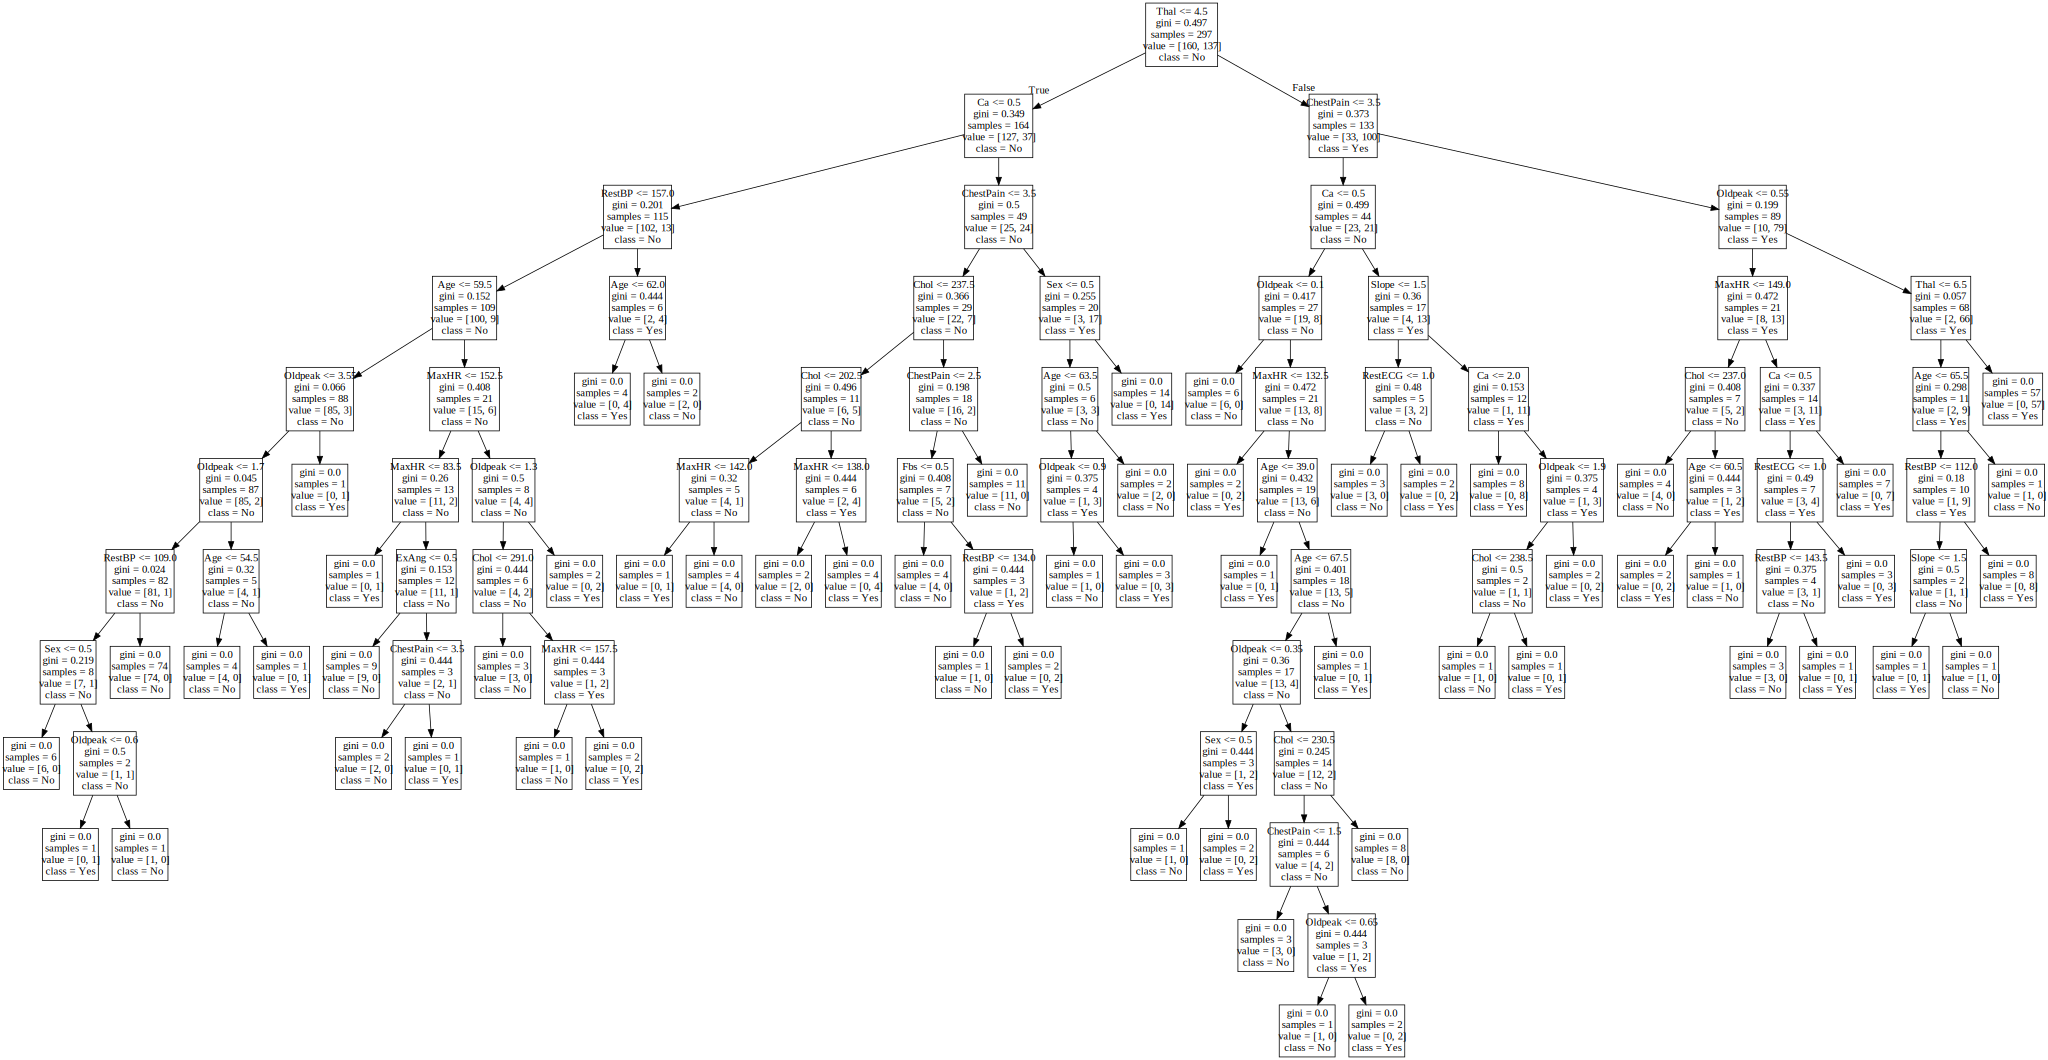

In [9]:
## Question 5: Create Visuzalization of Decision Tree

dot_data = tree.export_graphviz(model, out_file=None,
                               feature_names=Xvalues.columns,
                               class_names=AHD)
graph = gv.Source(dot_data)
graph.render("Decision Tree")
graph

In [10]:
Vdf_dict = dict(zip(Xvalues.columns, model.feature_importances_))

# print(Vdf_dict)

In [11]:
## Question 6: Create DataFrame with 'Variable Name' and 'Variable Importance'

Vdf = pd.DataFrame.from_dict(Vdf_dict, orient = 'index')
Vdf['VarName'] = Vdf.index
Vdf.columns = 'Importance', 'Name'
Vdf = Vdf.sort_values(by=['Importance', 'Name'])

Text(0,0.5,'Variable Name')

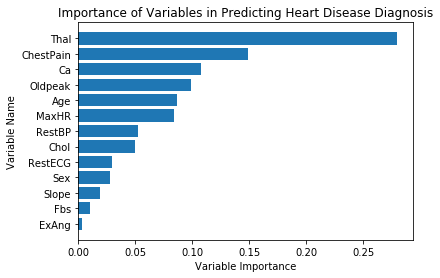

In [12]:
## Question 7: Create a Horizontal Bar Plot Visualizing Variable Importance

plt.figure()
plt.barh(Vdf.Name, Vdf.Importance)
plt.title('Importance of Variables in Predicting Heart Disease Diagnosis')
plt.xlabel('Variable Importance')
plt.ylabel('Variable Name')

### The Relative Importance of Variables in Predicting A Heart Disease Diagnosis

Based on my model (which, as discussed above, is not particularly accurate), it appears as if the results of an individual's Thallium stress test is far and away the most important variable in predicting whether or not that individual will ultimately receive a diagnosis of heart disease. The second-most important variable (but less than half as important as the results of a Thallium stress test) in predicting whether or not an individual will recieve a diagnosis of heart disease is their type of chest pain, closely followed by the number of major vessels colored by flourosopy. 

The least important variable, apparently holding no importance at all, is whether or not the patient experiences exercise-induced angina.